In [1]:
# TERM PROJECT FACE RECOGNITION 
import cv2
import numpy as np
import os
import time
import pandas as pd
import matplotlib.pyplot as plt
import random

import warnings
warnings.filterwarnings('ignore')

/var/folders/np/gq4pf7wx2b1btsznkmxtvtzh0000gn/T/ipykernel_20027/3725897288.py:6: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
csv_path='./data_set/Dataset.csv'
df=pd.read_csv(csv_path)
train_images=df

print(len(train_images))

2562


In [3]:
def plot_img(image):
    plt.imshow(image)
    plt.axis('off')  # Turn off axis
    plt.show()

In [4]:
# Training the images to a model
label_name={
        
    }
label_id_name={
        
    }
label_dict = {
       
        
        
    }

LOADING DATA SET FOR TRAINING THE MODEL 


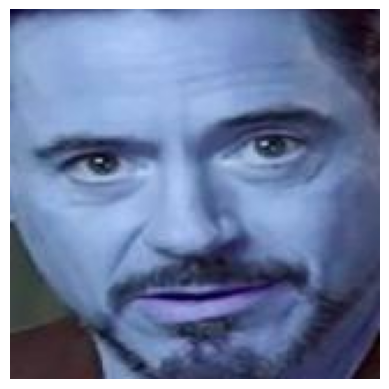

LOADING DATA SET FOR TRAINING THE MODEL 


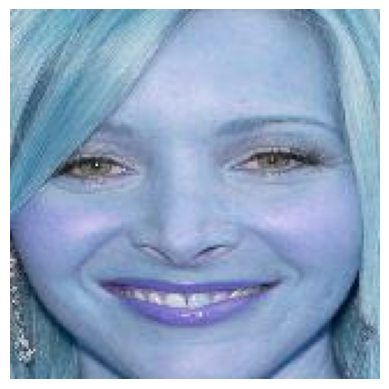

LOADING DATA SET FOR TRAINING THE MODEL 


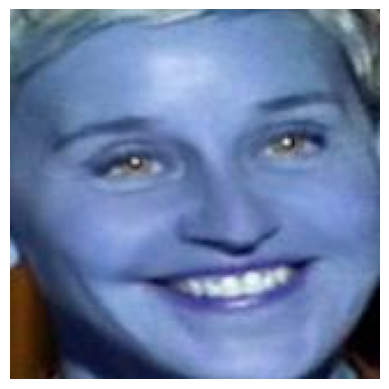

LOADING DATA SET FOR TRAINING THE MODEL 


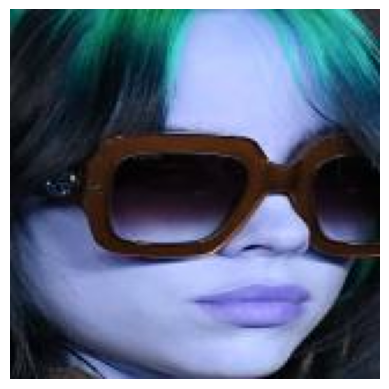

LOADING DATA SET FOR TRAINING THE MODEL 


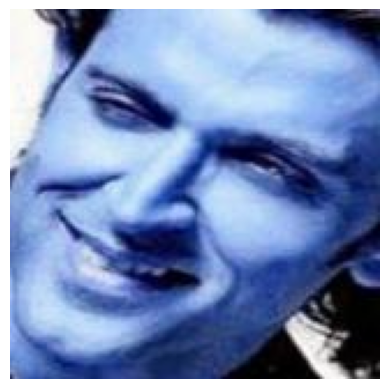

Training completed


In [5]:

def get_images_with_labels(data_dir):
    images = []
    labels = []
    label_id = 0
    for index,row in train_images.iterrows():
        # print(row)
        label = row.iloc[1]
        path=row.iloc[0]
        # path=label+'/'+path
        path=data_dir.format(path)
        # print(label,path)
        
        if label not in label_dict:
            label_dict[label] = label_id
            label_id_name[label_id]=label
            label_id += 1
        
        # Read and preprocess image
        image = cv2.imread(path)
        if index<5:
            print("LOADING DATA SET FOR TRAINING THE MODEL ")

            plot_img(image)
            
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale
        image = cv2.resize(image, (128, 128))  # Resize image
        for _ in range(35):# do this for enchanced training 
            images.append(image)
            labels.append(label_dict[label])
    
    # print(len(images),len(labels))
    return images, labels

data_dir = './data_set/Faces/Faces/{0}'
data_dir2 = './data_set/Original Images/Original Images/{0}'

images, labels = get_images_with_labels(data_dir)

recognizer = cv2.face.LBPHFaceRecognizer_create()

# print('label_dict',label_dict)
# print('label_id_name',label_id_name)
#Save the trained model
recognizer.train(np.array(images), np.array(labels))

# recognizer.save('face_rec_model.yml')

print("Training completed")


In [6]:

def recognize_face(image,is_validation=True):
    # Load pre-trained face detection and recognition models
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
    
    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        label, confidence = recognizer.predict(roi_gray)
        print(label, confidence)
        # print('predicted ',label,label_name[label_id_name[label]])
        # Threshold for face recognition
        
        threshold = 60
        if is_validation:
            threshold=50
        
        if confidence > threshold:
            print('predicted',label_id_name[label])
            cv2.rectangle(image, (x, y), (x+w, y+h), (255, 255, 255), 1)
            cv2.putText(image, label_id_name[label], (x, y+10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (200, 255, 50), 1)
        else:
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cv2.putText(image, 'Unknown', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
    
    return image




RUNNING MODEL ON TEST IMAGES THAT ARE  IN TARIN DATE SET
Priyanka Chopra_48.jpg
ACTUAL Priyanka Chopra
11 92.13076490905996
predicted Priyanka Chopra


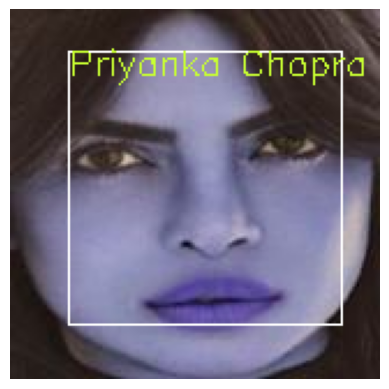

Brad Pitt_108.jpg
ACTUAL Brad Pitt
16 50.31314986564073
predicted Brad Pitt


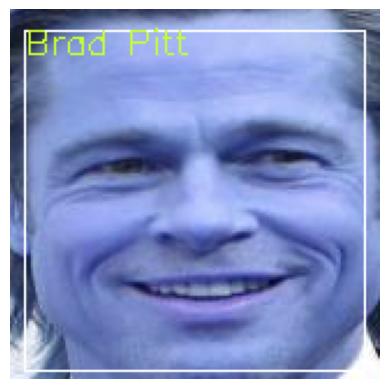

Courtney Cox_68.jpg
ACTUAL Courtney Cox
24 66.42219400577254
predicted Courtney Cox


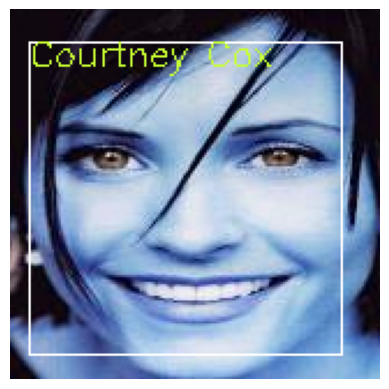

In [7]:
# VALIDATION TEST ON 3 images that are part in train data
def testing_on_train_data(data_dir):
  

    print("RUNNING MODEL ON TEST IMAGES THAT ARE  IN TARIN DATE SET")
    validation_images=['Priyanka Chopra_48.jpg','Brad Pitt_108.jpg','Courtney Cox_68.jpg']
    for path in validation_images:
       
        
        
        label = path.split('_')[0]
        print(path)
        print('ACTUAL',label)
        path=data_dir.format(path)
        image = cv2.imread(path)
        result = recognize_face(image)
        plot_img(result)

data_dir = './data_set/Faces/Faces/{0}'

testing_on_train_data(data_dir)

RUNNING MODEL ON TEST IMAGES THAT ARE NOT IN TARIN DATA SET
19 65.08406729765662
predicted Akshay Kumar


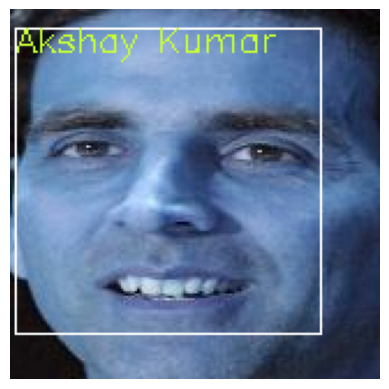

5 57.698839816743096
predicted Vijay Deverakonda


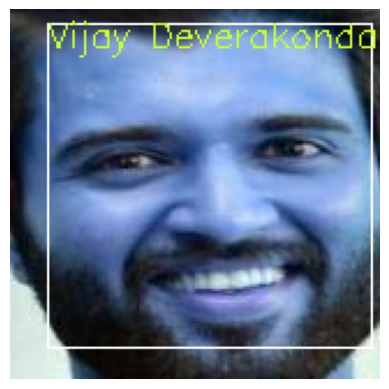

In [8]:
# TEST ON 2 images that different from train data
def testing_on_test_data(test_dir,test_dir_path):
    print("RUNNING MODEL ON TEST IMAGES THAT ARE NOT IN TARIN DATA SET")
    for file in os.listdir(test_dir):
        if file.endswith('.jpg'):
            path=test_dir_path.format(file)
            image = cv2.imread(path)
            result = recognize_face(image)
            plot_img(result)
        
       
        
        

test_dir='./test_dir'
test_dir_path='./test_dir/{}'
testing_on_test_data(test_dir,test_dir_path)